<a href="https://colab.research.google.com/github/XanOlazcuagaGaribal/python/blob/main/Analyse_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyse de dataset

Dataset sur la vente de jeux vidéos entre 1980 et 2020


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/DC/Algorithmie/Data/Games/'
games = pd.read_csv(root_path + "vgsales.csv", sep=",")

Mounted at /content/gdrive


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


 Les colonnes correspondent à:
 - **Rank**: Rang du jeu
 - **Name**: Nom du jeu
 - **Platform**: Plateforme de publication du jeu
 - **Year**: Année de sortie du jeu en **float**
 - **Genre**: Genre du jeu
 - **Publisher**: Studio de création du jeu
 - **NA_Sales**: Nombre de ventes en Amérique du Nord en million
 - **EU_Sales**: Nombre de ventes en Europe en million
 - **JP_Sales**: Nombre de ventes au Japon en million
 - **Other_Sales**: Nombre de ventes dans les autres pays en million
 - **Global_Sales**: Nombre de ventes totales en million


In [5]:
games.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [78]:
games['Year'].min()

1980

In [79]:
games['Year'].max()

2020

#Traitement des données manquantes

In [46]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [48]:
games = games.dropna(subset = ['Year'])
games = games.dropna(subset = ['Publisher'])
games.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#Conversion de l'année en Int64

In [57]:
games['Year'] = games['Year'].astype(np.int64)
games['Year']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16291, dtype: int64

#Analyse

In [ ]:
games['Publisher'].unique()

Comme on peut le voir il y a de nombreuses entreprises. Dans un premier temps nous allons voir quelques données en général, puis nous prendrons une entreprise particulière pour voir ses données.

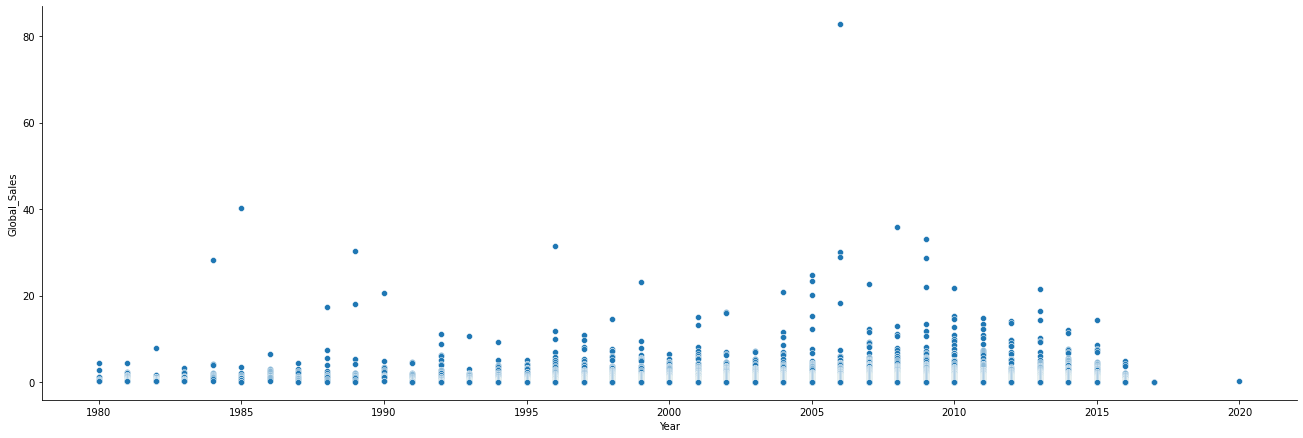

In [86]:

sns.relplot(x="Year", y="Global_Sales", data = games,height=6, aspect = 3);
 

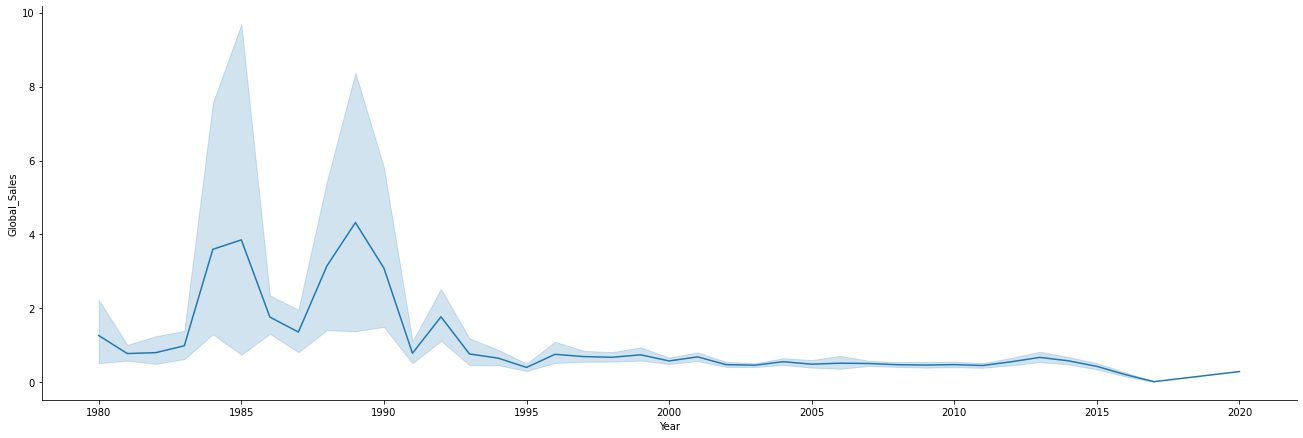

In [88]:
sns.relplot(x="Year", y="Global_Sales", data = games,height=6, aspect = 3,kind='line');

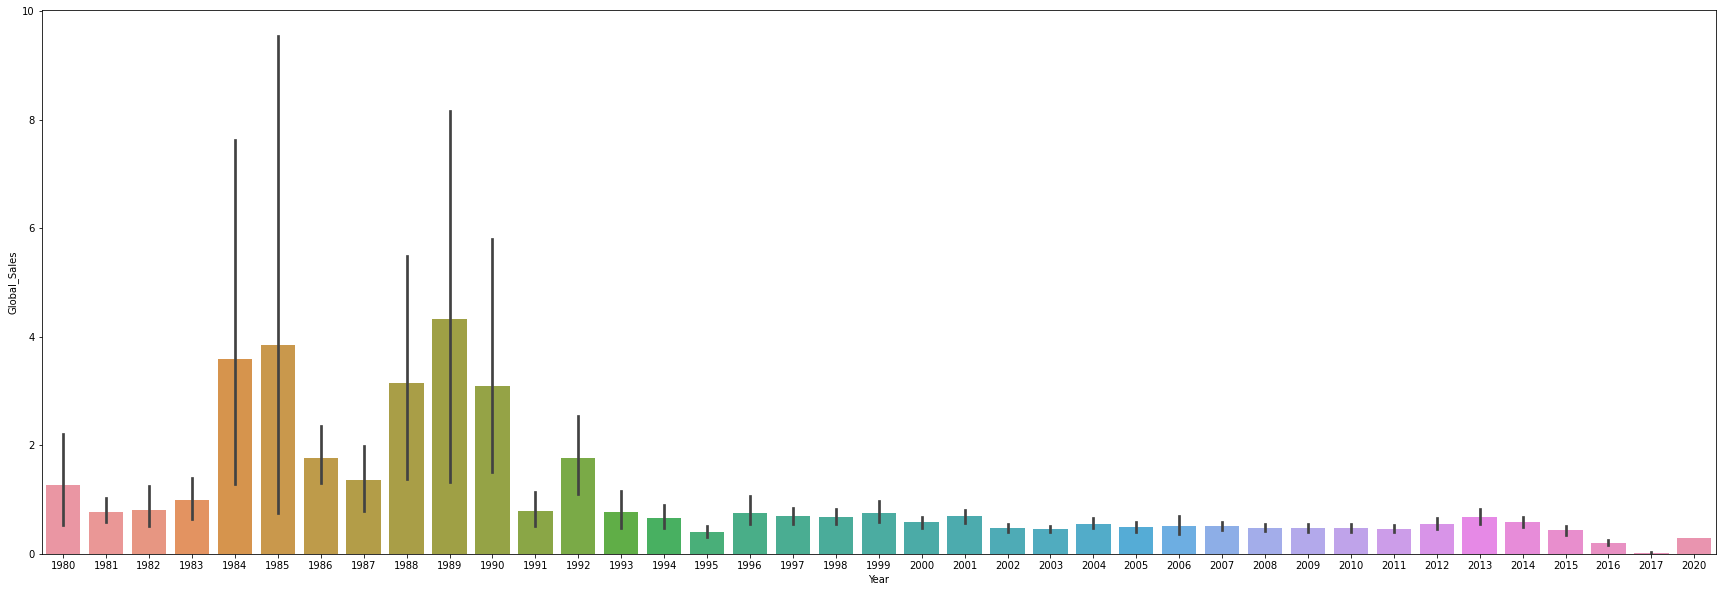

In [98]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Year", y="Global_Sales",ax=ax, data=games)

On peut constater que pour la plupart des jeux vendus, le résultat mondiale ne dépasse pas les 20 millions. 

Lorsque que l'on regarde en détail les consoles présentent dans ce dataset, on remarque qu'il manque des données puisqu'il n'y a aucune sortie de jeux entre 2017 et 2020 alors que la PS4 est dans ce classement.

In [52]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [56]:
gb_sales = games[['Name','Platform','Year','Genre','Publisher','Global_Sales']].nlargest(3,'Global_Sales')
gb_sales

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82


In [58]:
na_sales = games[['Name','Platform','Year','Genre','Publisher','NA_Sales']].nlargest(3,'NA_Sales')
na_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93


In [59]:
eu_sales = games[['Name','Platform','Year','Genre','Publisher','EU_Sales']].nlargest(3,'EU_Sales')
eu_sales

,Name,Platform,Year,Genre,Publisher,EU_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,29.02
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,12.88
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,11.01


In [60]:
jp_sales = games[['Name','Platform','Year','Genre','Publisher','JP_Sales']].nlargest(3,'JP_Sales')
jp_sales

,Name,Platform,Year,Genre,Publisher,JP_Sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,10.22
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,7.20
1,Super Mario Bros.,NES,1985,Platform,Nintendo,6.81


On a ici le top 3 des meilleures ventes globales, en Amérique du Nord, en Europe et au Japon. Comme on peut le voir, c'est Nintendo qui domine avec en premier Wii Sports, qui a généré 82.74 millions d'euros dans le monde.

Pour la suite nous allons donc utiliser les données de Nintendo, puisque c'est la plus importante de ce dataset.

Évolution des meilleurs genre de jeux par années

In [121]:
games['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

# Nintendo

On va donc se focaliser sur Nintendo. Pour cela on récupère toutes les données du dataset que l'on copie dans une nouvelle variable pour ne pas modifier le dataset original

In [61]:
# On crée le dataset Nintendo
nintendo = games[games['Publisher'] == 'Nintendo'].copy()

In [62]:
nintendo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 16542
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          696 non-null    int64  
 1   Name          696 non-null    object 
 2   Platform      696 non-null    object 
 3   Year          696 non-null    int64  
 4   Genre         696 non-null    object 
 5   Publisher     696 non-null    object 
 6   NA_Sales      696 non-null    float64
 7   EU_Sales      696 non-null    float64
 8   JP_Sales      696 non-null    float64
 9   Other_Sales   696 non-null    float64
 10  Global_Sales  696 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 65.2+ KB


In [63]:
nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Maitenant que l'on a insolé Nintendo, nous allons pouvoir regarder l'évolution des ventes

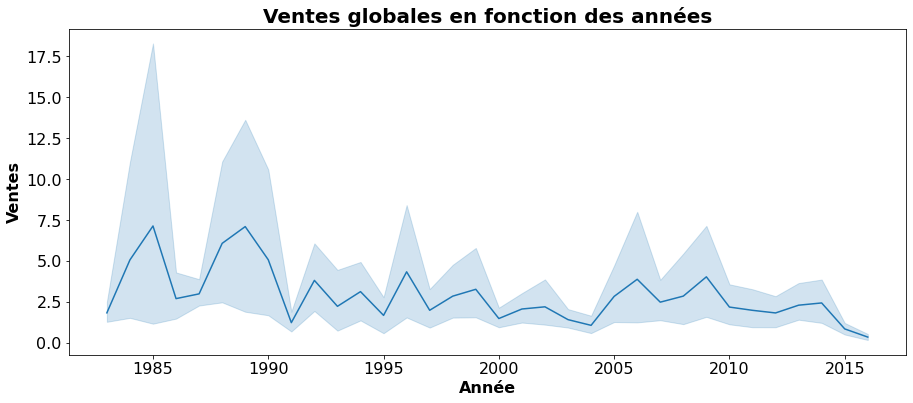

In [64]:
fig, ax = plt.subplots(figsize=(15, 6))
nintendo_sales = nintendo[['Year','Global_Sales']]
sns.lineplot(x='Year',y='Global_Sales',data = nintendo_sales)

ax.set_title('Ventes globales en fonction des années', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Ventes', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

On constate ici qu'il manque valeurs qu'on peut considérer comme abérentes par rapport au reste des données. Par exemple on peut voir, dans la figure suivante, qu'il manque la valeur 82.74 de Wii Sport. Cela peut s'expliquer par le fait que la 1ère figure fait une moyenne de ces valeurs. 

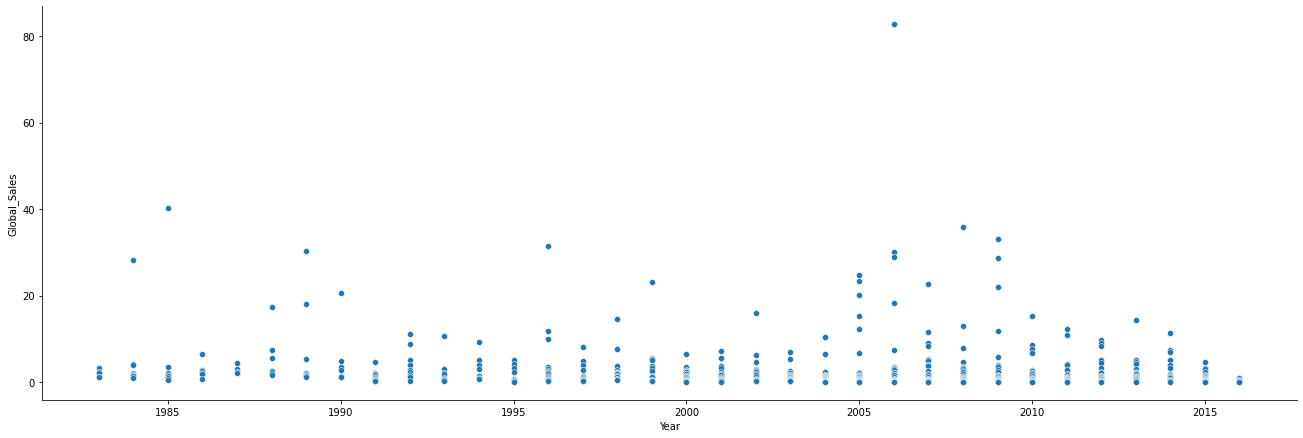

In [65]:
nintendo_sales = nintendo[['Year','Global_Sales']]
sns.relplot(x="Year", y="Global_Sales", data = nintendo_sales,height=6, aspect = 3);


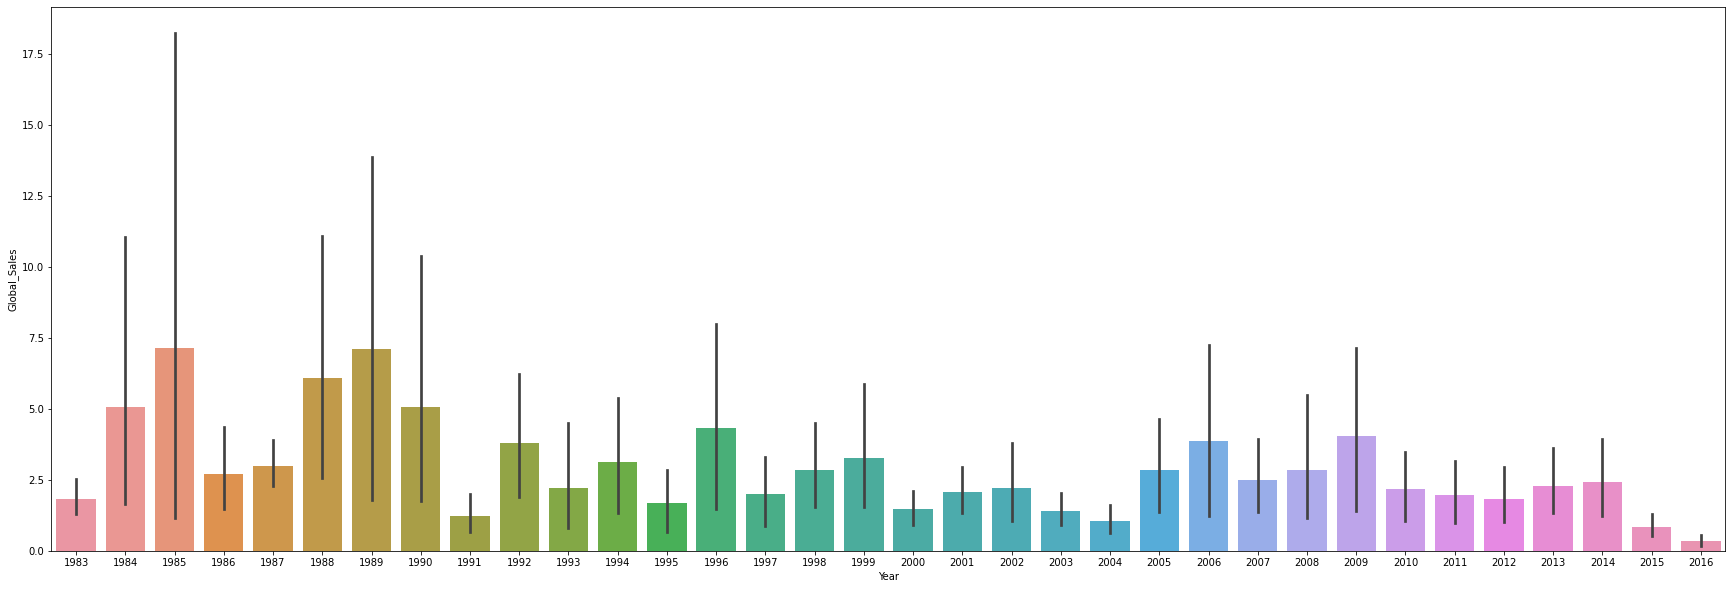

In [130]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Year", y="Global_Sales",ax=ax, data=nintendo)

On peut également regarder le nombre de sorties par année, mais d'abord nous allons traiter les données manquantes

In [67]:
nintendo['Year'].value_counts()

2004    57
2006    53
2005    45
2007    42
2015    32
2009    32
2008    32
2012    31
2010    28
2003    27
2011    26
2013    23
2000    23
2001    22
2002    22
1999    20
2014    20
1998    17
1996    17
1997    13
1991    13
1992    10
2016    10
1995    10
1993     9
1989     9
1984     9
1994     8
1990     7
1985     7
1988     6
1986     6
1983     6
1987     4
Name: Year, dtype: int64

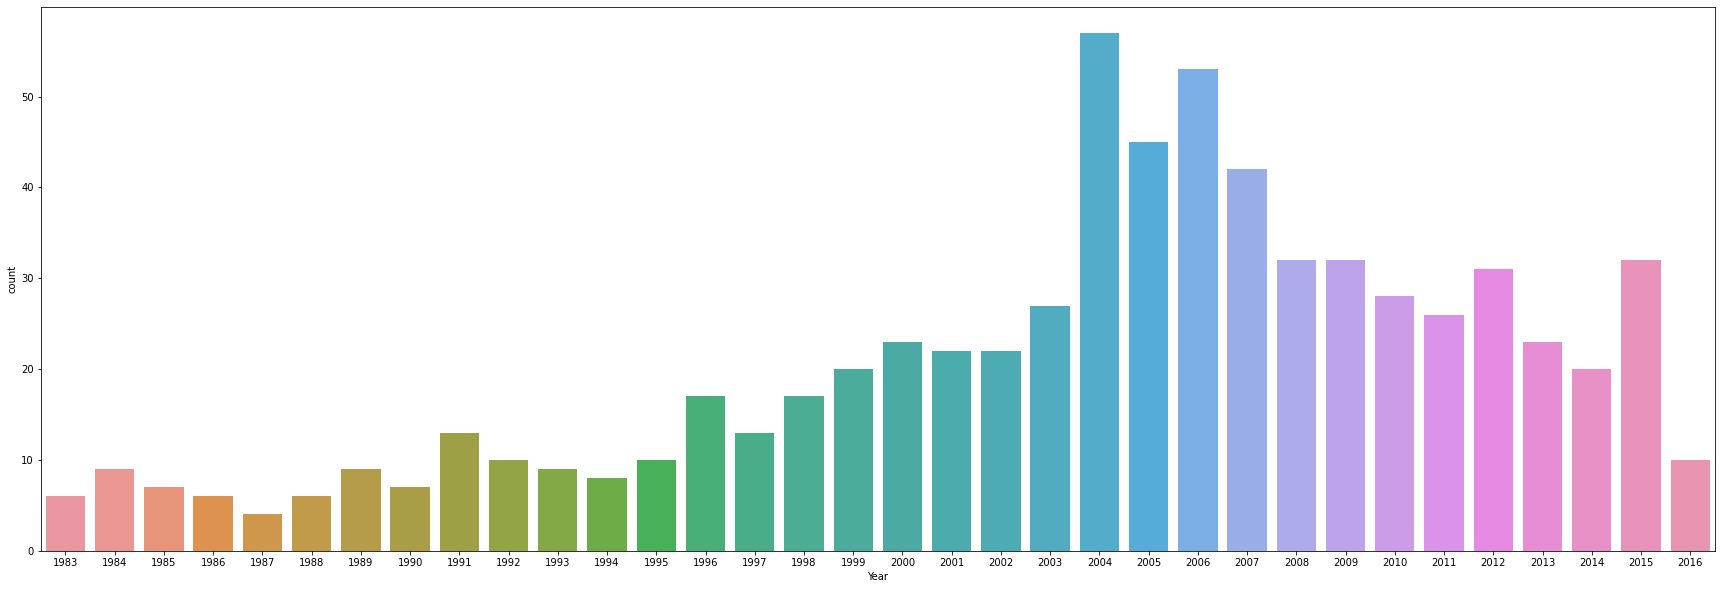

In [69]:
plt.figure(figsize=(30,10))
sns.countplot(x="Year", data=nintendo)

##Analyse par console


In [70]:
nintendo["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'SNES', 'GBA', '3DS', 'N64', 'GC',
       'WiiU'], dtype=object)

On va maintenant regarder les ventes pour les jeux NES

In [71]:
nintendo_nes = nintendo[nintendo['Platform'] == 'NES'].copy()

In [72]:
nintendo_nes.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
22,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
127,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.51


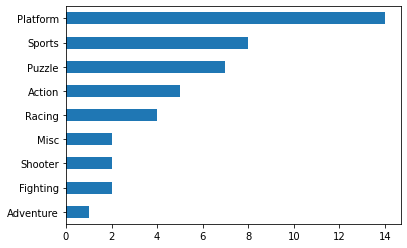

In [73]:
count = nintendo_nes['Genre'].value_counts()
nintendo_nes['Genre'].value_counts().sort_values().plot(kind = 'barh')

Nous pouvons constater que les jeux les plus développés pour la NES sont les jeux de platforme. Nous allons donc utiliser ces jeux pour la suite. 

In [77]:
nes_platform = nintendo_nes[nintendo_nes['Genre'] == 'Platform'].copy()
nes_platform.head(14)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
22,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
573,574,Super Mario Bros.: The Lost Levels,NES,1986,Platform,Nintendo,0.00,0.00,2.65,0.00,2.65
700,702,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
992,994,Kid Icarus,NES,1986,Platform,Nintendo,0.53,0.12,1.09,0.02,1.76
1010,1012,Kirby's Adventure,NES,1993,Platform,Nintendo,0.79,0.14,0.80,0.02,1.75
1187,1189,Donkey Kong Classics,NES,1988,Platform,Nintendo,0.59,0.14,0.81,0.02,1.56
1260,1262,Ice Climber,NES,1985,Platform,Nintendo,0.46,0.10,0.92,0.02,1.50
1809,1811,Donkey Kong,NES,1983,Platform,Nintendo,0.23,0.05,0.84,0.01,1.13


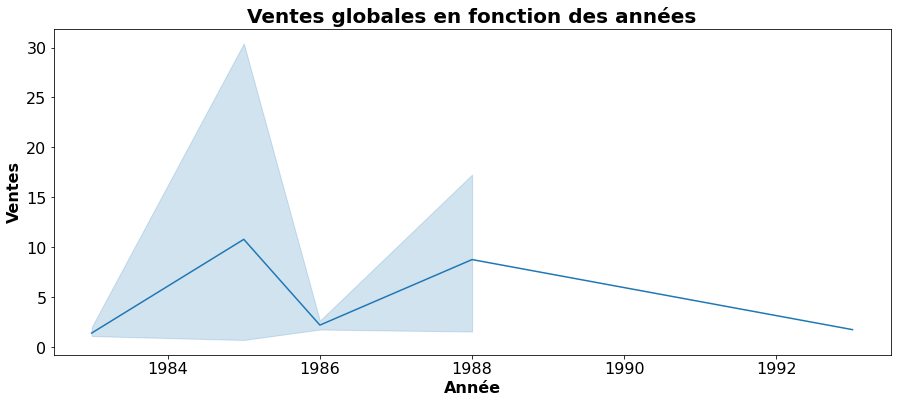

In [75]:
fig, ax = plt.subplots(figsize=(15, 6))
nintendo_platSales = nes_platform[['Year','Global_Sales']]
sns.lineplot(x='Year', y='Global_Sales',data=nintendo_platSales )

ax.set_title('Ventes globales en fonction des années', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Ventes', fontsize = 16, fontdict=dict(weight='bold'))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

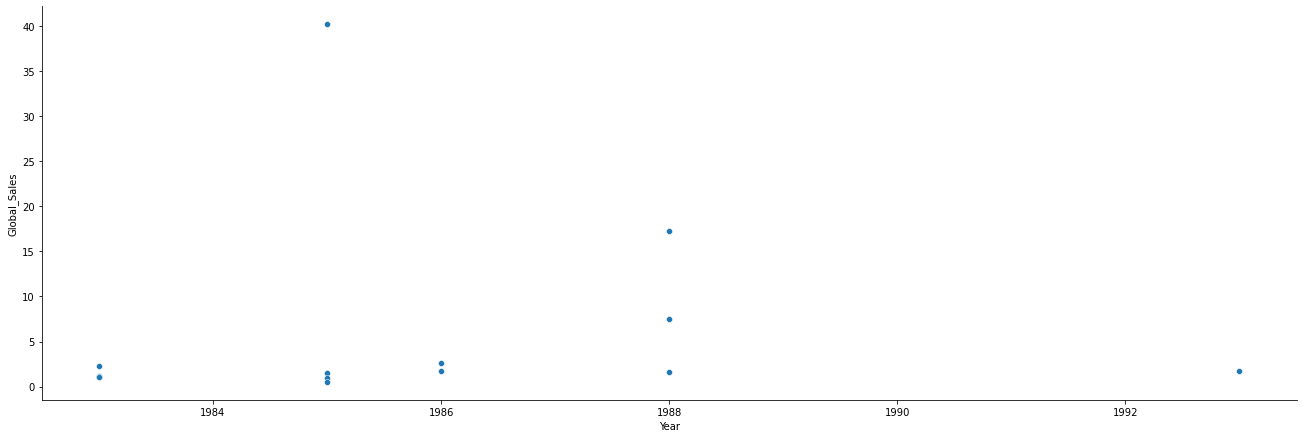

In [76]:
nintendo_platSales = nes_platform[['Year','Global_Sales']]
sns.relplot(x="Year", y="Global_Sales", data = nintendo_platSales,height=6, aspect = 3);

On peut utiliser ces données par exmple si Nintendo envisage de créer un nouveau jeu NES. L'entreprise peut voir qu'après les années 90, les jeux 